## Elipsoide_Clark_FAT_Canal_de_Lava_Triaxial_Prolate

## Coisas para importar

In [56]:
import numpy as np
from scipy import linalg
from matplotlib import pyplot as plt

from fatiando import mesher, gridder, utils
from fatiando.vis import mpl

import scipy.special
import scipy.interpolate

%matplotlib inline

## Importar minhas funções de um arquivo externo

In [57]:
import Elipsoide_Clark_FAT_Unificado as me5

#### Fatiando a Terra - Ellipsoid

In [58]:
# Malha coordenadas geograficas
xmin = -100.
xmax = 100.
ymin = -90.
ymax = 90.
Nx = 200
Ny = 200

#xc posicao x , yc posição y e zc profundidade reais
xc = np.arange(-100,100,5)
yc = 0.01*xc**2 - 90
zc = 50.

# Orientacoes do elipsoide
azimuth = np.deg2rad(82.75)
delta = np.deg2rad(45.)
gamma = np.deg2rad(0.)

# Eixos do elipsoide
a = 0.79
b = 0.50
c = 0.45

# Create a regular grid at 0m height
shape = (Nx, Ny)
area = [xmin, xmax, ymin, ymax]
Xp, Yp, Zp = gridder.regular(area, shape, z=0.)

################################################################################################################################
model1 = []  #Triaxial
# Set the inclination and declination of the regional field
inten, inc, dec  = 60000., np.deg2rad(50.), np.deg2rad(20.)
# Create a ellipsoid model
for i in range (len(xc)):
    model1.append(me5.Ellipsoid(Xp, Yp, Zp, xc[i], yc[i], zc, a, b, c, azimuth, delta, gamma, 
                          {'remanence': np.array([10000, np.deg2rad(45.86), np.deg2rad(25.06)]),
                           'k1': np.array([(0.01), np.deg2rad(90.), np.deg2rad(0.)]),
                           'k2': np.array([(0.01), np.deg2rad(180.), np.deg2rad(0.)]),
                           'k3': np.array([(0.01), np.deg2rad(0.), np.deg2rad(90.)])}
                          ))

################################################################################################################################
################################################################################################################################
model2 = []  #Prolate
# Set the inclination and declination of the regional field
inten, inc, dec  = 60000., np.deg2rad(50.), np.deg2rad(20.)
# Create a ellipsoid model
for i in range (len(xc)):
    model2.append(me5.Ellipsoid(Xp, Yp, Zp, xc[i], yc[i], zc, a, b, b, azimuth, delta, gamma, 
                          {'remanence': np.array([10000, np.deg2rad(45.86), np.deg2rad(25.06)]),
                           'k1': np.array([(0.01), np.deg2rad(90.), np.deg2rad(0.)]),
                           'k2': np.array([(0.01), np.deg2rad(180.), np.deg2rad(0.)]),
                           'k3': np.array([(0.01), np.deg2rad(0.), np.deg2rad(90.)])}
                          ))

In [59]:
model1[0].conf

['Triaxial', 'Isotropic magnetization']

In [60]:
model2[0].conf

['Prolate', 'Isotropic magnetization']

In [61]:
# Calculate the anomaly for a given regional field (Triaxial)
JRD_cart = me5.jrd_cartesiano (inten,inc,dec,model1)
Bx = me5.bx_c (Xp,Yp,Zp,inten,inc,dec,model1)
By = me5.by_c (Xp,Yp,Zp,inten,inc,dec,model1)
Bz = me5.bz_c (Xp,Yp,Zp,inten,inc,dec,model1)
Tf = me5.tf_c (Xp,Yp,Zp,inten,inc,dec,model1)

Bx = np.reshape(Bx, shape)
By = np.reshape(By, shape)
Bz = np.reshape(Bz, shape)
Tf = np.reshape(Tf, shape)

# Calculate the anomaly for a given regional field (Prolate)
JRD_cart2 = me5.jrd_cartesiano (inten,inc,dec,model2)
Bx2 = me5.bx_c (Xp,Yp,Zp,inten,inc,dec,model2)
By2 = me5.by_c (Xp,Yp,Zp,inten,inc,dec,model2)
Bz2 = me5.bz_c (Xp,Yp,Zp,inten,inc,dec,model2)
Tf2 = me5.tf_c (Xp,Yp,Zp,inten,inc,dec,model2)

Bx2 = np.reshape(Bx2, shape)
By2 = np.reshape(By2, shape)
Bz2 = np.reshape(Bz2, shape)
Tf2 = np.reshape(Tf2, shape)

## Resultado da minha função

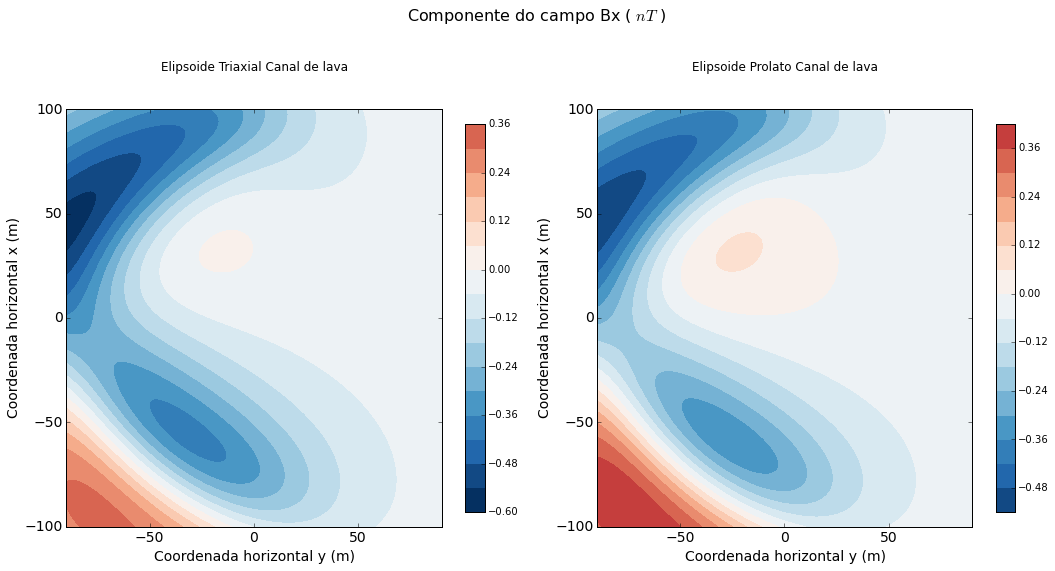

In [62]:
rangesBx = np.max(np.abs([np.max(Bx), np.min(Bx),
                          np.max(Bx2), np.min(Bx2)]))

plt.figure(figsize=(15,8))

plt.suptitle('Componente do campo Bx ( $nT$ )',y=1.04, fontsize=16, x=0.5)

plt.subplot(1,2,1)
plt.title('Elipsoide Triaxial Canal de lava', y=1.08)
plt.axis('scaled')
mpl.contourf(Yp,Xp,Bx,shape,15,
            vmin = -rangesBx, vmax = rangesBx,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Coordenada horizontal y (m)', fontsize=14)
plt.ylabel('Coordenada horizontal x (m)', fontsize=14)

plt.subplot(1,2,2)
plt.title('Elipsoide Prolato Canal de lava', y=1.08)
plt.axis('scaled')
mpl.contourf(Yp,Xp,Bx2,shape,15,
            vmin = -rangesBx, vmax = rangesBx,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Coordenada horizontal y (m)', fontsize=14)
plt.ylabel('Coordenada horizontal x (m)', fontsize=14)

plt.tight_layout()

plt.show()

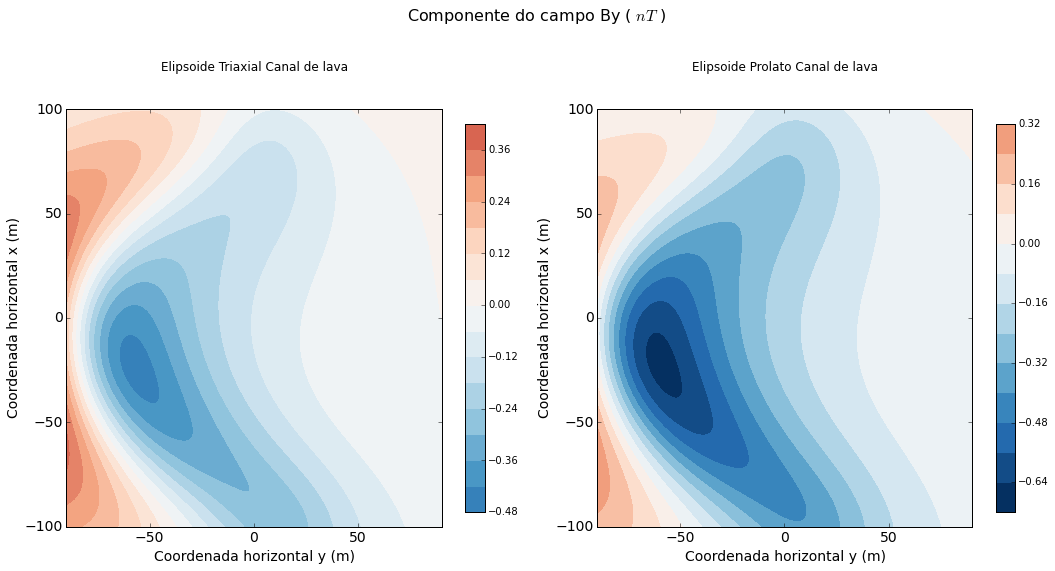

In [63]:
rangesBy = np.max(np.abs([np.max(By), np.min(By),
                          np.max(By2), np.min(By2)]))

plt.figure(figsize=(15,8))

plt.suptitle('Componente do campo By ( $nT$ )',y=1.04, fontsize=16, x=0.5)

plt.subplot(1,2,1)
plt.title('Elipsoide Triaxial Canal de lava', y=1.08)
plt.axis('scaled')
mpl.contourf(Yp,Xp,By,shape,15,
            vmin = -rangesBy, vmax = rangesBy,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Coordenada horizontal y (m)', fontsize=14)
plt.ylabel('Coordenada horizontal x (m)', fontsize=14)

plt.subplot(1,2,2)
plt.title('Elipsoide Prolato Canal de lava', y=1.08)
plt.axis('scaled')
mpl.contourf(Yp,Xp,By2,shape,15,
            vmin = -rangesBy, vmax = rangesBy,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Coordenada horizontal y (m)', fontsize=14)
plt.ylabel('Coordenada horizontal x (m)', fontsize=14)

plt.tight_layout()

plt.show()

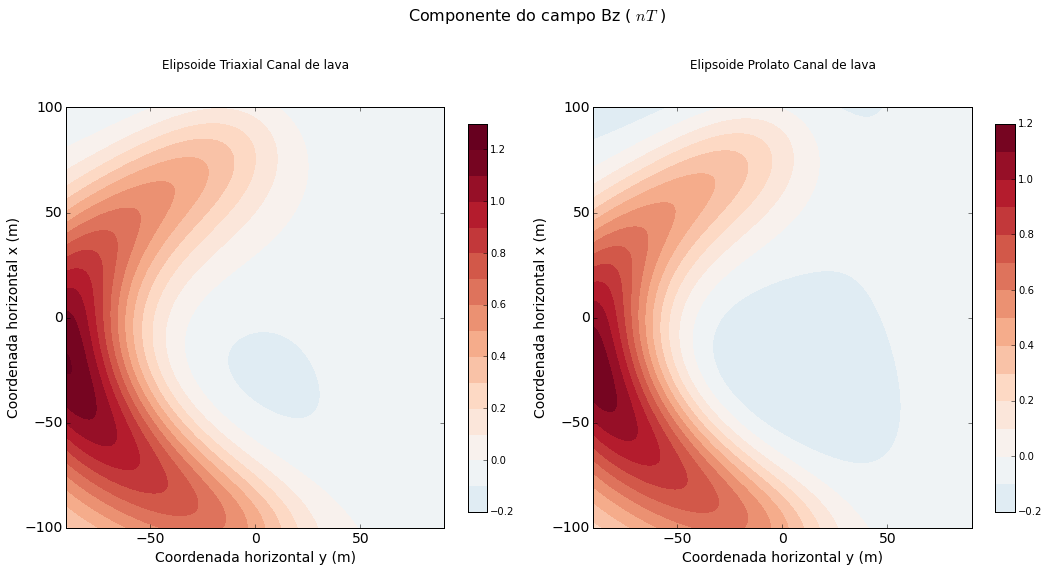

In [64]:
rangesBz = np.max(np.abs([np.max(Bz), np.min(Bz),
                          np.max(Bz2), np.min(Bz2)]))

plt.figure(figsize=(15,8))

plt.suptitle('Componente do campo Bz ( $nT$ )',y=1.04, fontsize=16, x=0.5)

plt.subplot(1,2,1)
plt.title('Elipsoide Triaxial Canal de lava', y=1.08)
plt.axis('scaled')
mpl.contourf(Yp,Xp,Bz,shape,15,
            vmin = -rangesBz, vmax = rangesBz,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Coordenada horizontal y (m)', fontsize=14)
plt.ylabel('Coordenada horizontal x (m)', fontsize=14)

plt.subplot(1,2,2)
plt.title('Elipsoide Prolato Canal de lava', y=1.08)
plt.axis('scaled')
mpl.contourf(Yp,Xp,Bz2,shape,15,
            vmin = -rangesBz, vmax = rangesBz,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Coordenada horizontal y (m)', fontsize=14)
plt.ylabel('Coordenada horizontal x (m)', fontsize=14)

plt.tight_layout()

plt.show()

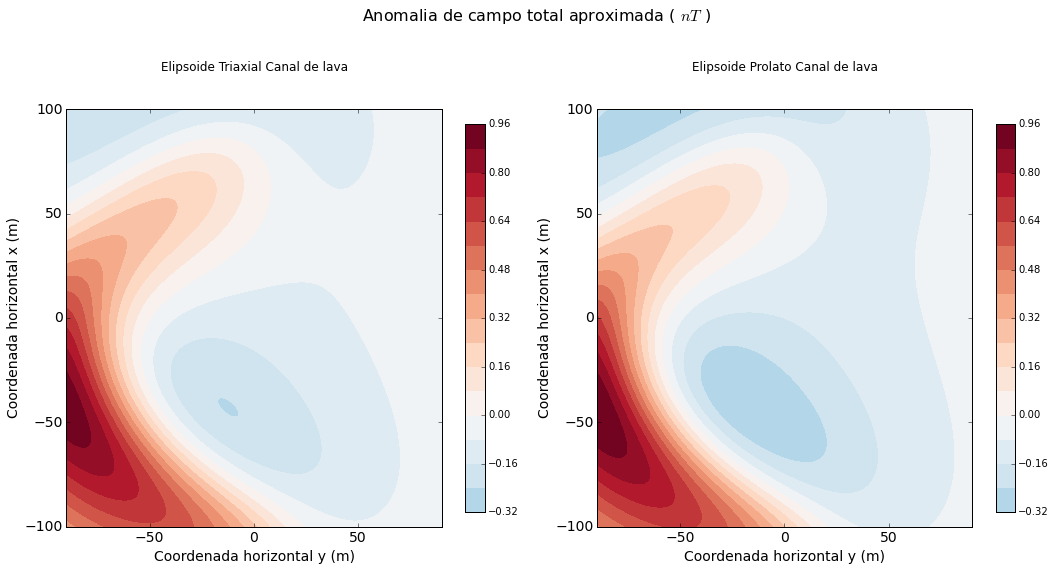

In [65]:
rangesTf = np.max(np.abs([np.max(Tf), np.min(Tf),
                          np.max(Tf2), np.min(Tf2)]))

plt.figure(figsize=(15,8))

plt.suptitle('Anomalia de campo total aproximada ( $nT$ )',y=1.04, fontsize=16, x=0.5)

plt.subplot(1,2,1)
plt.title('Elipsoide Triaxial Canal de lava', y=1.08)
plt.axis('scaled')
mpl.contourf(Yp,Xp,Tf,shape,15,
            vmin = -rangesTf, vmax = rangesTf,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Coordenada horizontal y (m)', fontsize=14)
plt.ylabel('Coordenada horizontal x (m)', fontsize=14)

plt.subplot(1,2,2)
plt.title('Elipsoide Prolato Canal de lava', y=1.08)
plt.axis('scaled')
mpl.contourf(Yp,Xp,Tf2,shape,15,
            vmin = -rangesTf, vmax = rangesTf,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Coordenada horizontal y (m)', fontsize=14)
plt.ylabel('Coordenada horizontal x (m)', fontsize=14)

plt.tight_layout()

plt.show()